# BaggingClassifier

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x= dataset.data
y= dataset.target

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=4)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.8951048951048951

In [5]:
#lets use bagging  over KNN classifier and see if our score improve

In [10]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=9, max_samples=0.7,
                           bootstrap=True,random_state=3,oob_score=True)

In [11]:
bag_knn.fit(x_train,y_train)

bag_knn.score(x_test,y_test)

0.9020979020979021

In [12]:
#great our score sginificantly improve with use of bagging

#lets not use bootstrap and see the model accuracy remember this is 'pasting'

In [13]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=9, max_samples=0.7,
                           bootstrap=False,random_state=3)

In [14]:
pasting_knn.fit(x_train,y_train)

pasting_knn.score(x_test,y_test)

0.8881118881118881

# Problem statement
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes

In [18]:
# important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing normalizing
from sklearn.preprocessing import StandardScaler

#models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [27]:
print(df.shape)

(69301, 13)


In [28]:
# drop id and duplicate names
df.drop('id',axis=1,inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [34]:
#check missing value
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

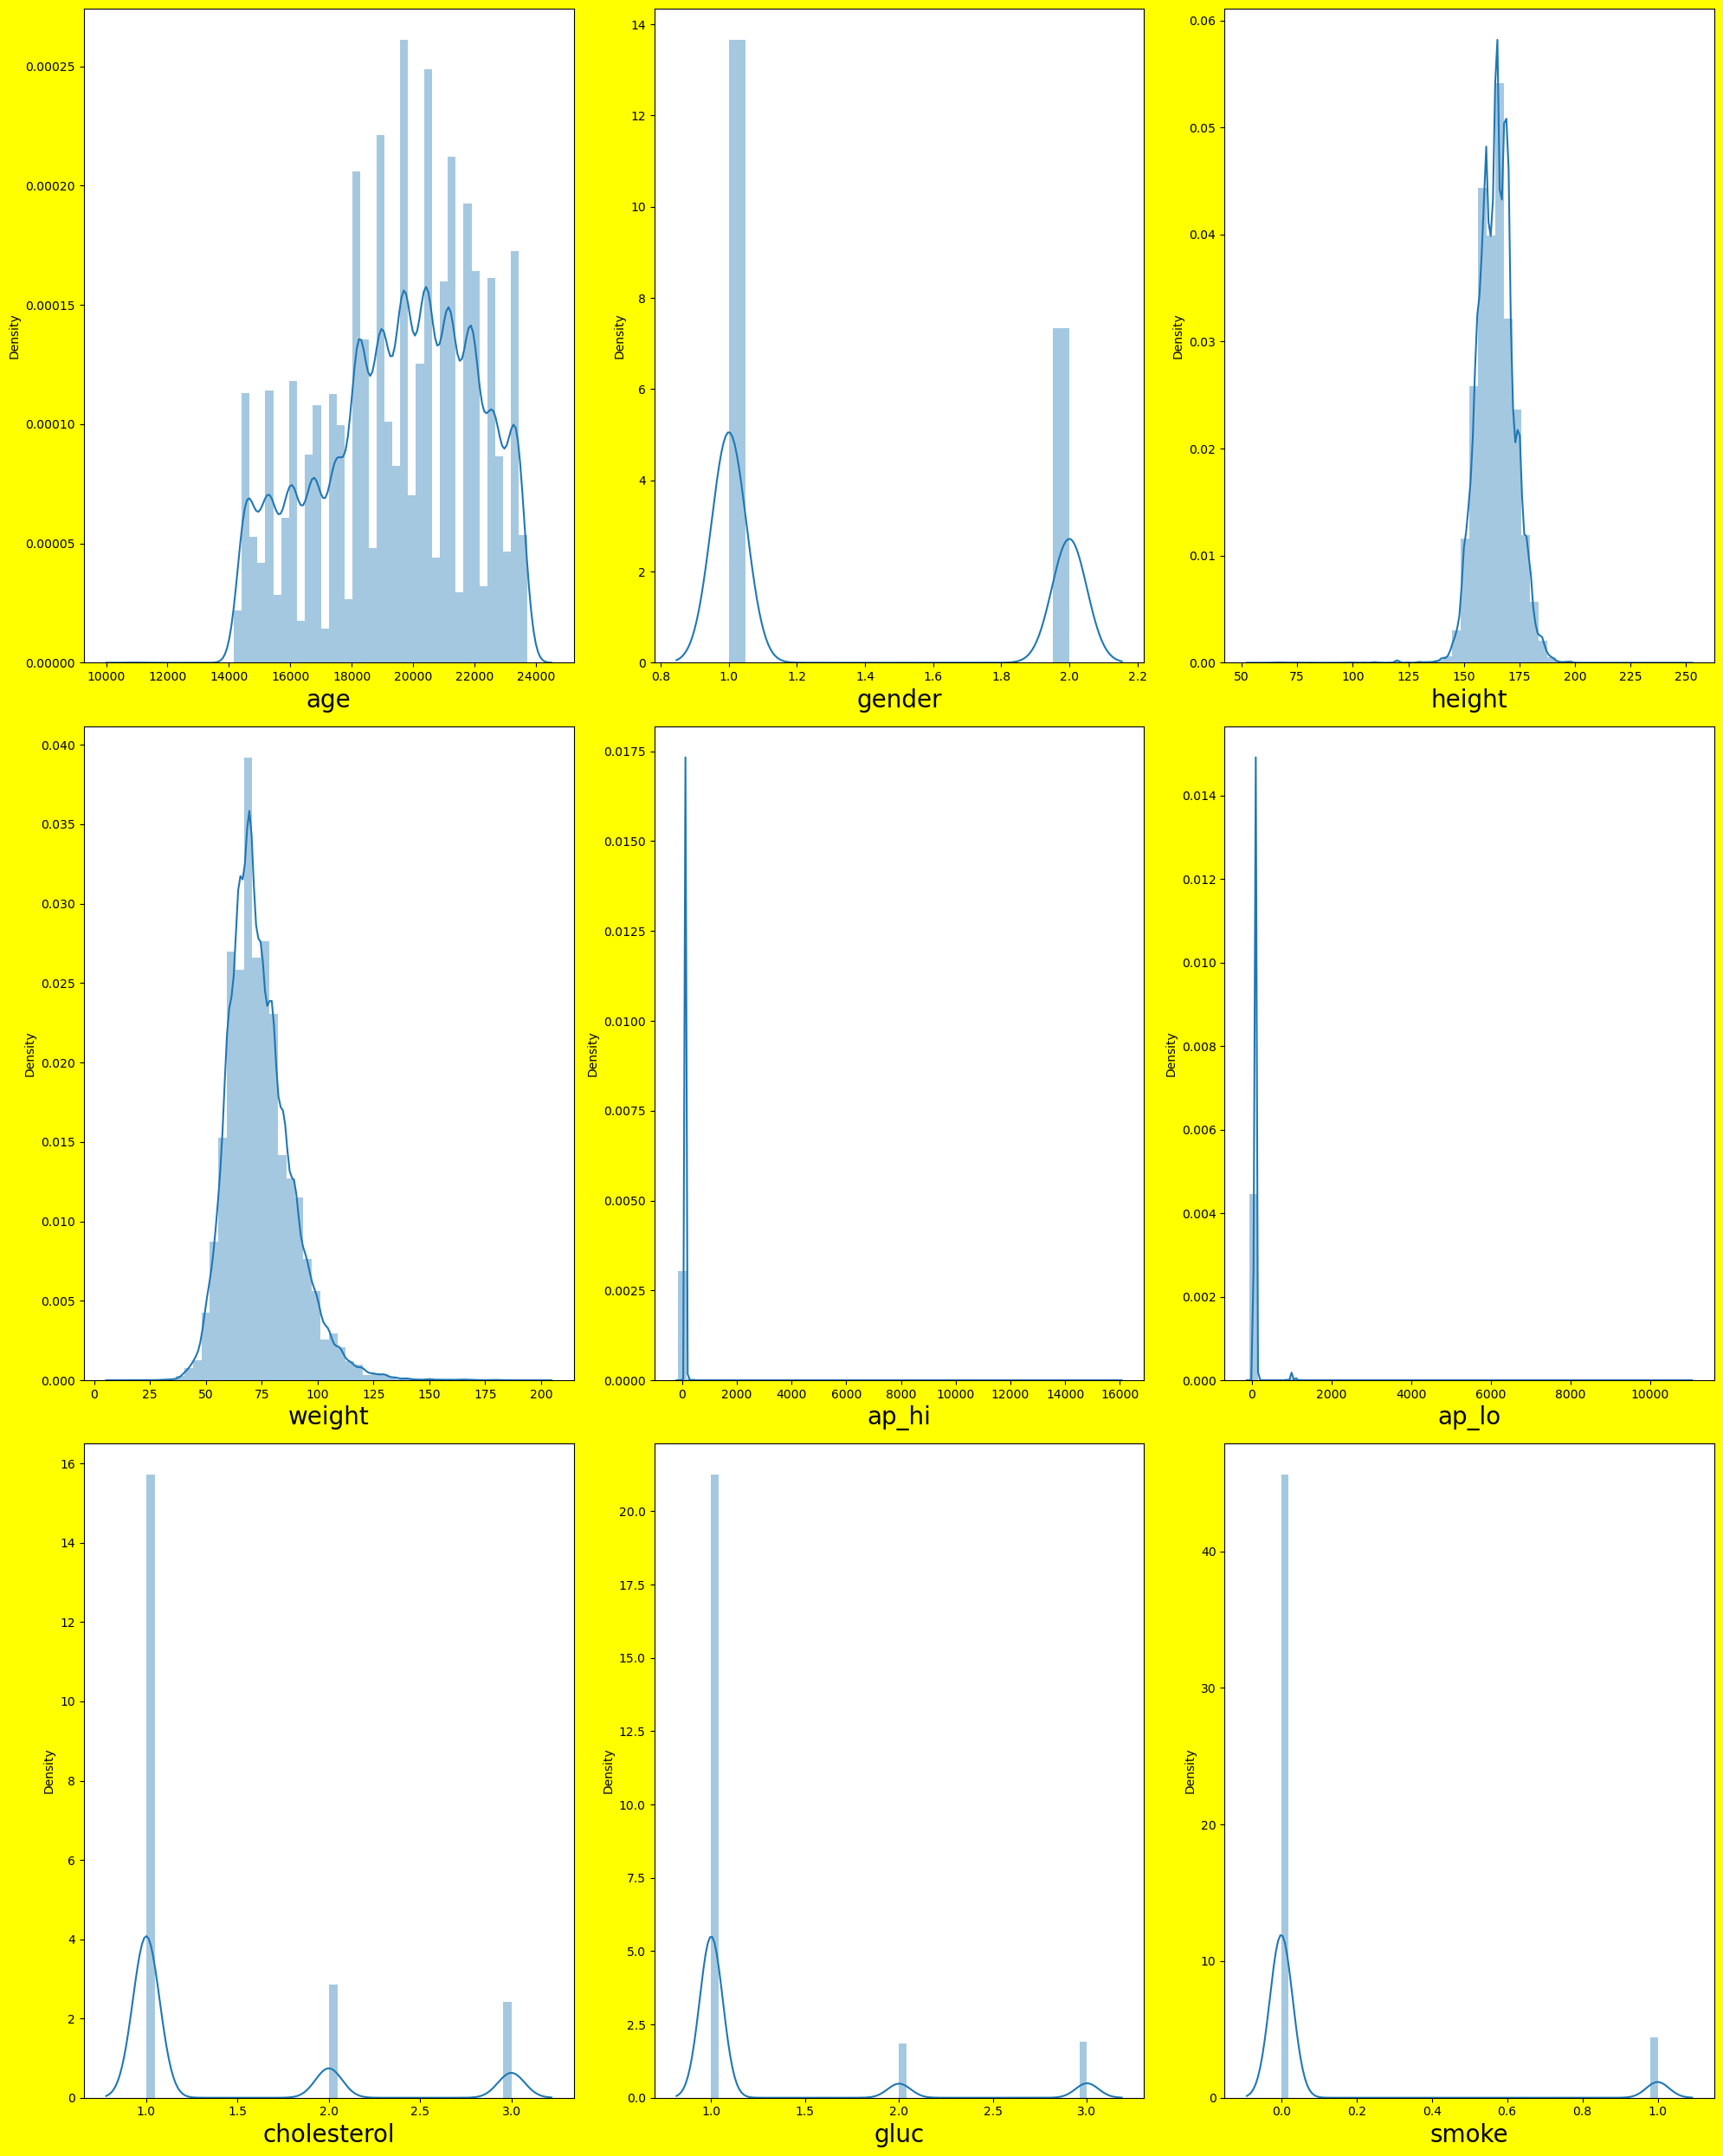

In [42]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<Axes: >

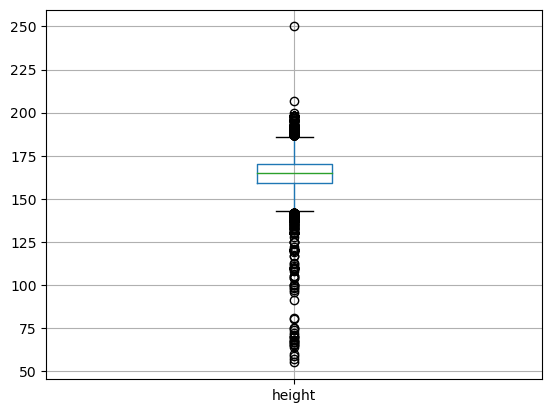

In [47]:
# check outliers
# Visualize the outliers using boxplot
df.boxplot(column='height')

<Axes: >

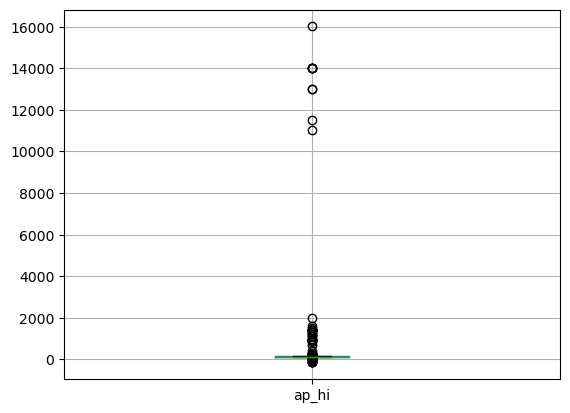

In [48]:
df.boxplot(column='ap_hi')

<Axes: >

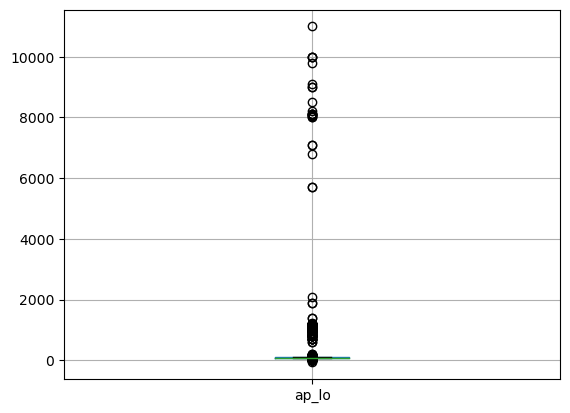

In [50]:
df.boxplot(column='ap_lo')

<Axes: >

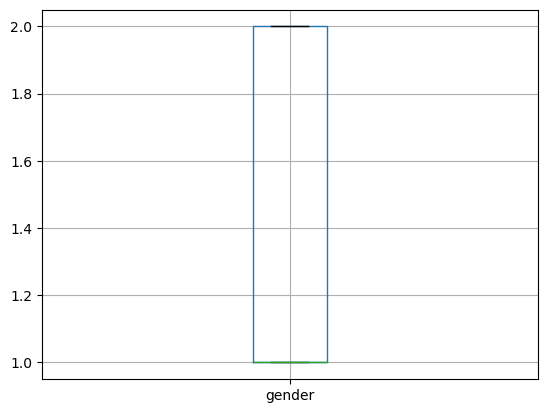

In [51]:
# how to remove duplicate
df.boxplot(column='gender')

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(69277, 12)

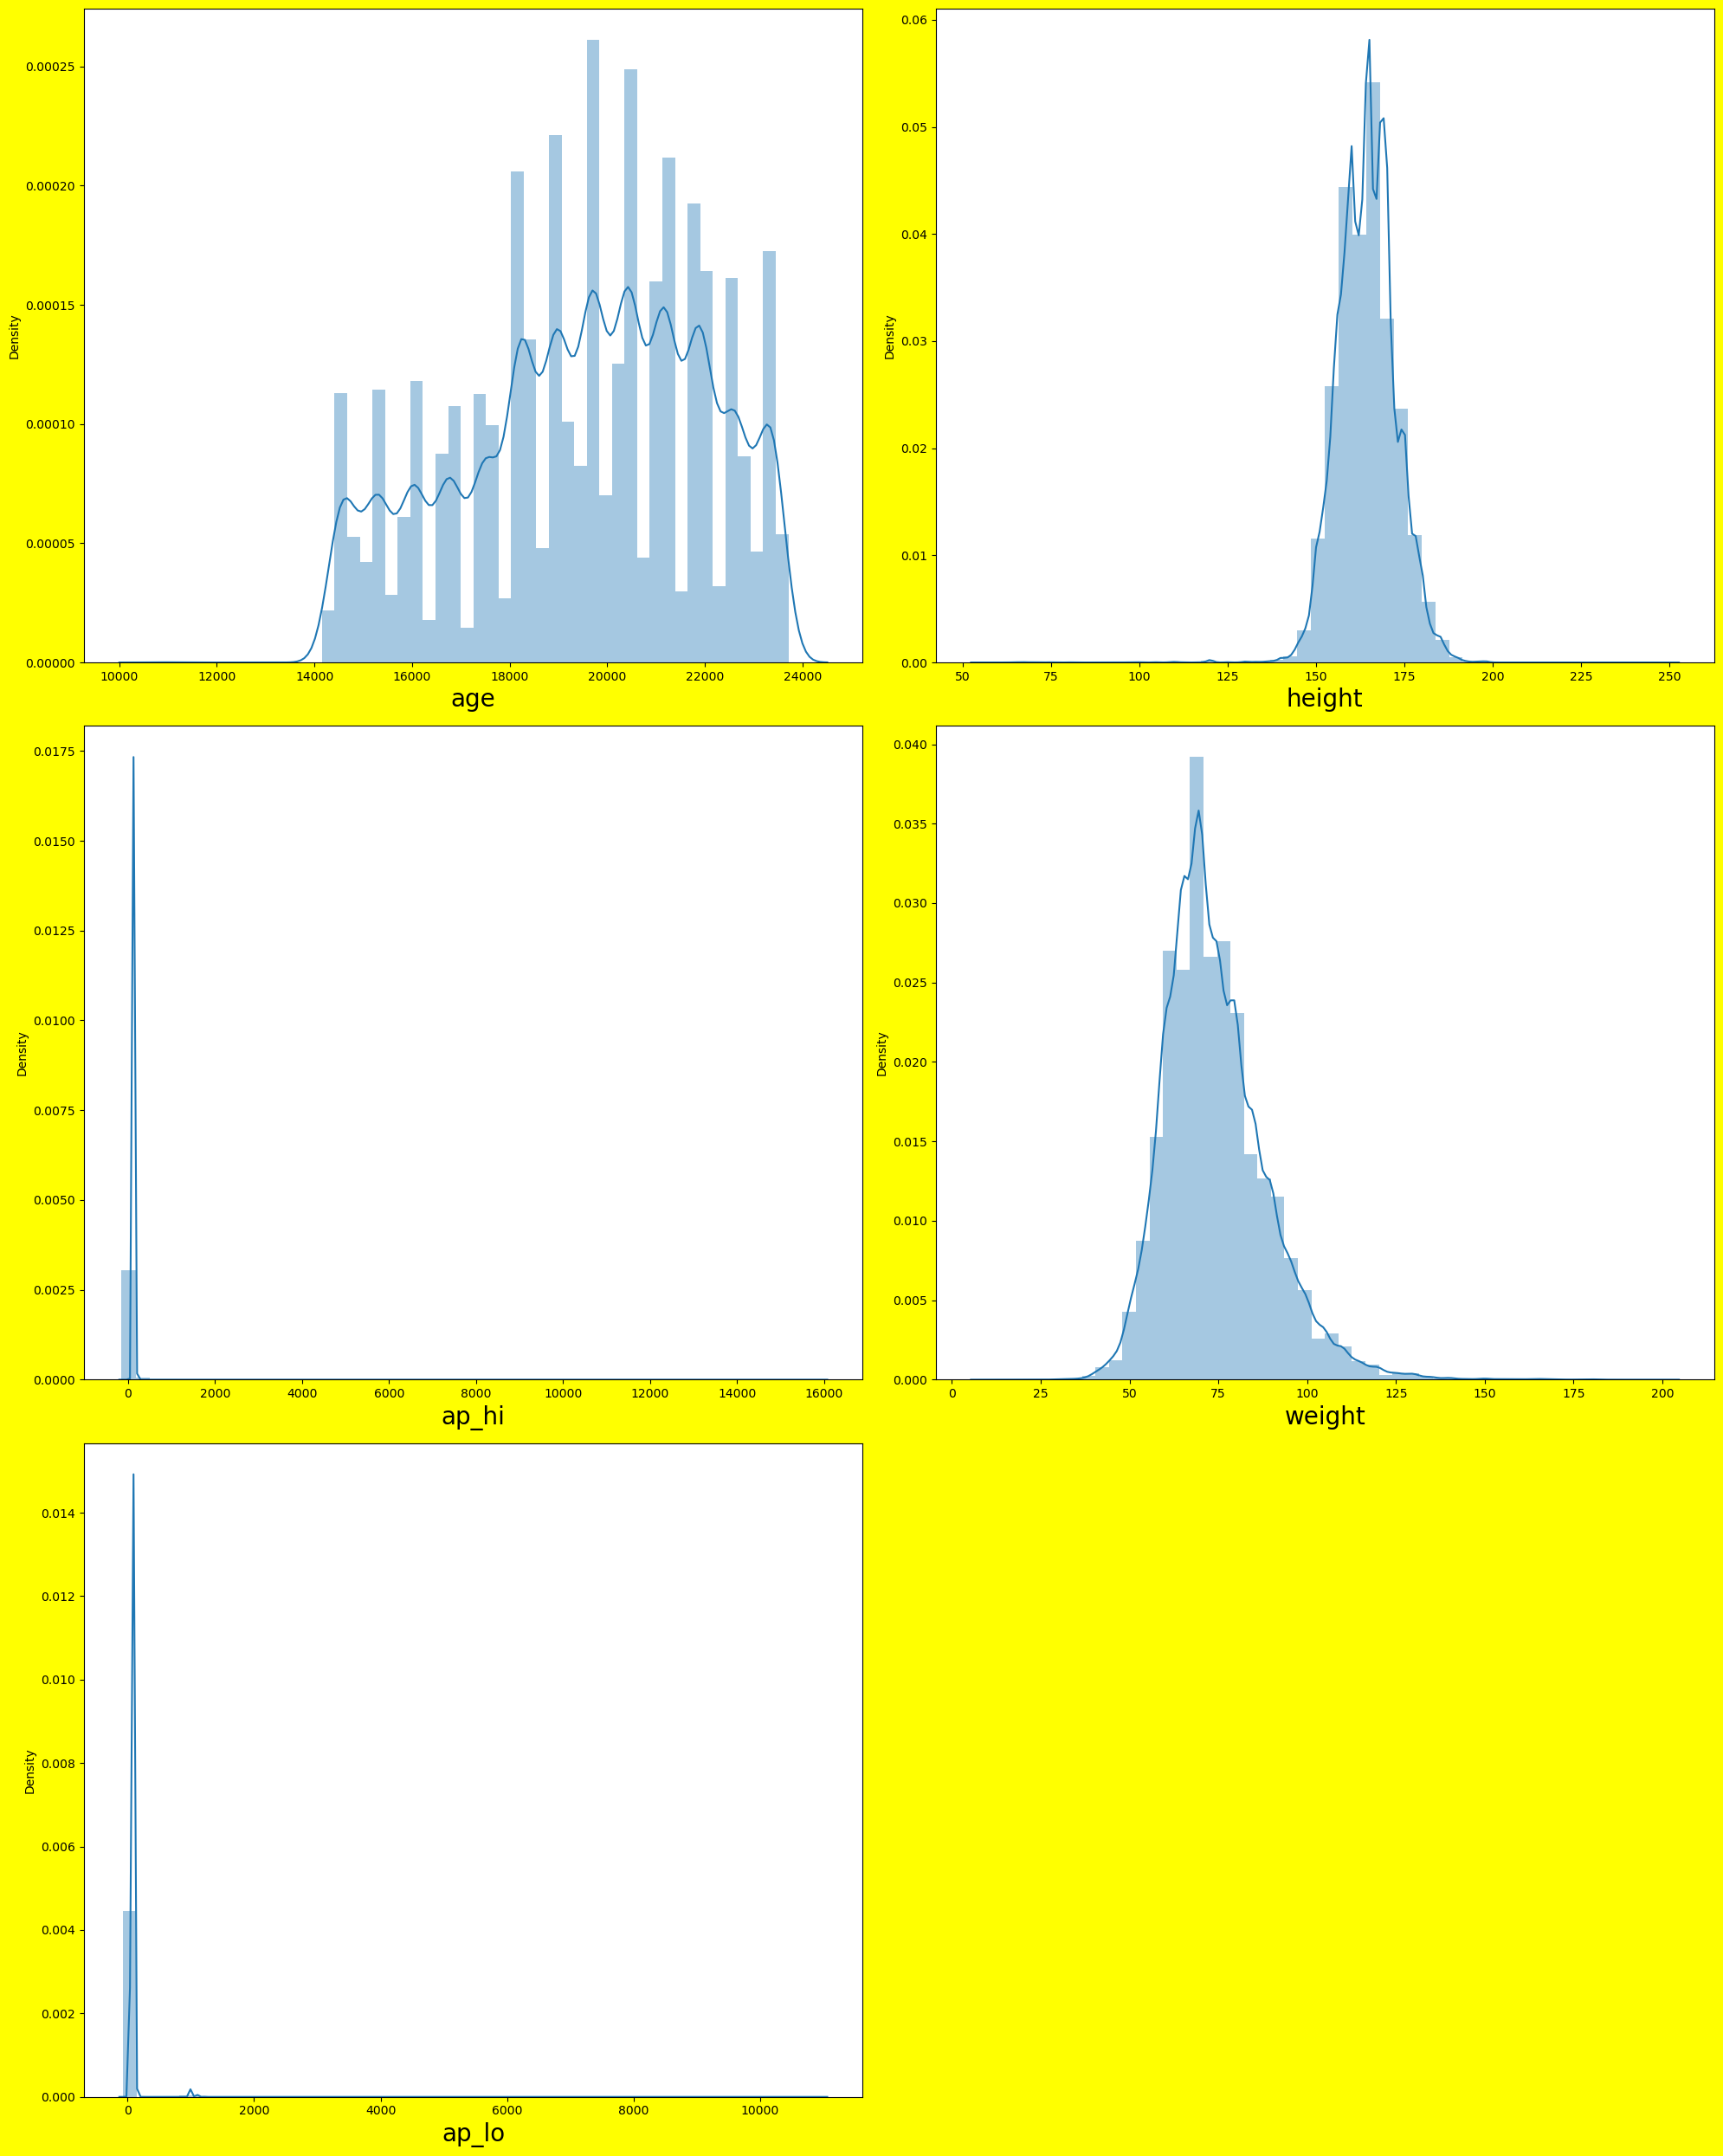

In [55]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# new method use to remove outliers
# Z Distribution/statistics
Lets transform our normal distribution into Z disribution (Standardize Normal Distribution). where mean = 0 and std =1

# z= (x-mean)/std

In [56]:
# with std 3 lets see the stats
#from scipy import stats

# Zscore = (x-mean)/std  => you have seen this in standard scaler
from scipy.stats import zscore

z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)  #Apply the formula and get the scaled data

filtering_entry = (abs_z_score < 3).all(axis=1)

df = df[filtering_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


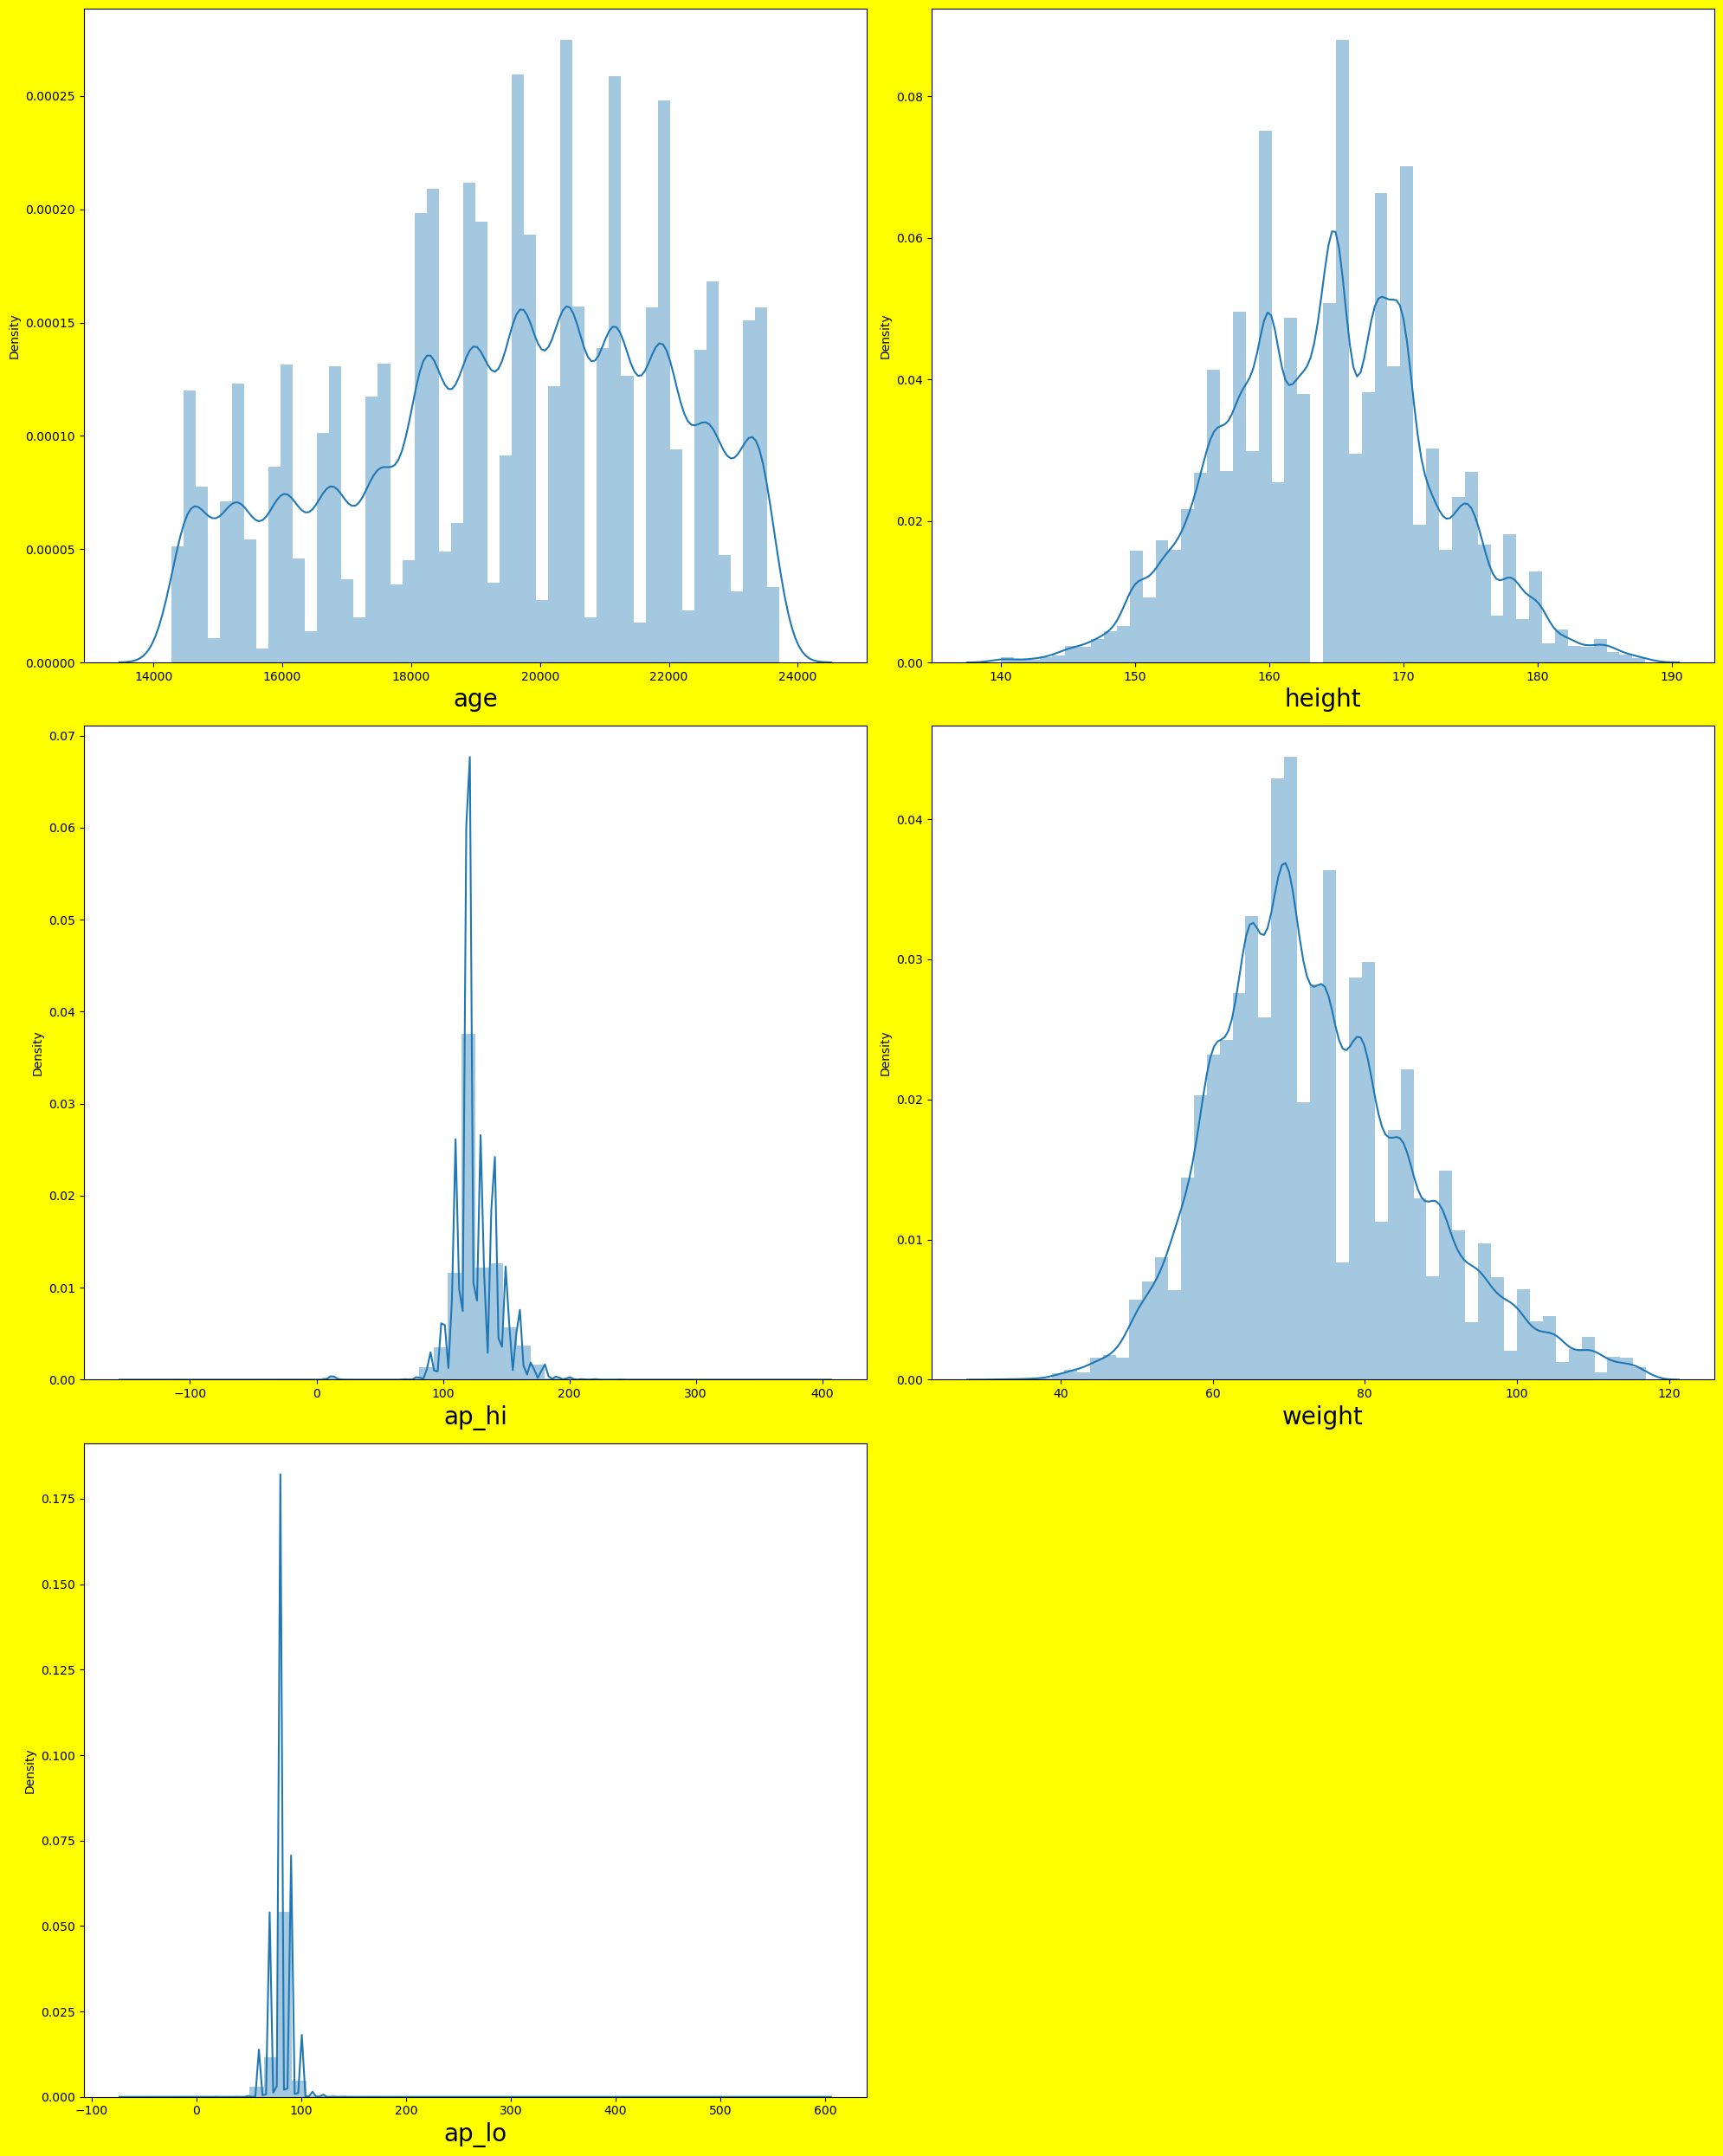

In [60]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [59]:
df.shape

(67360, 12)

In [62]:
X= df.drop(columns = ['cardio'], axis=1)
y = df['cardio']

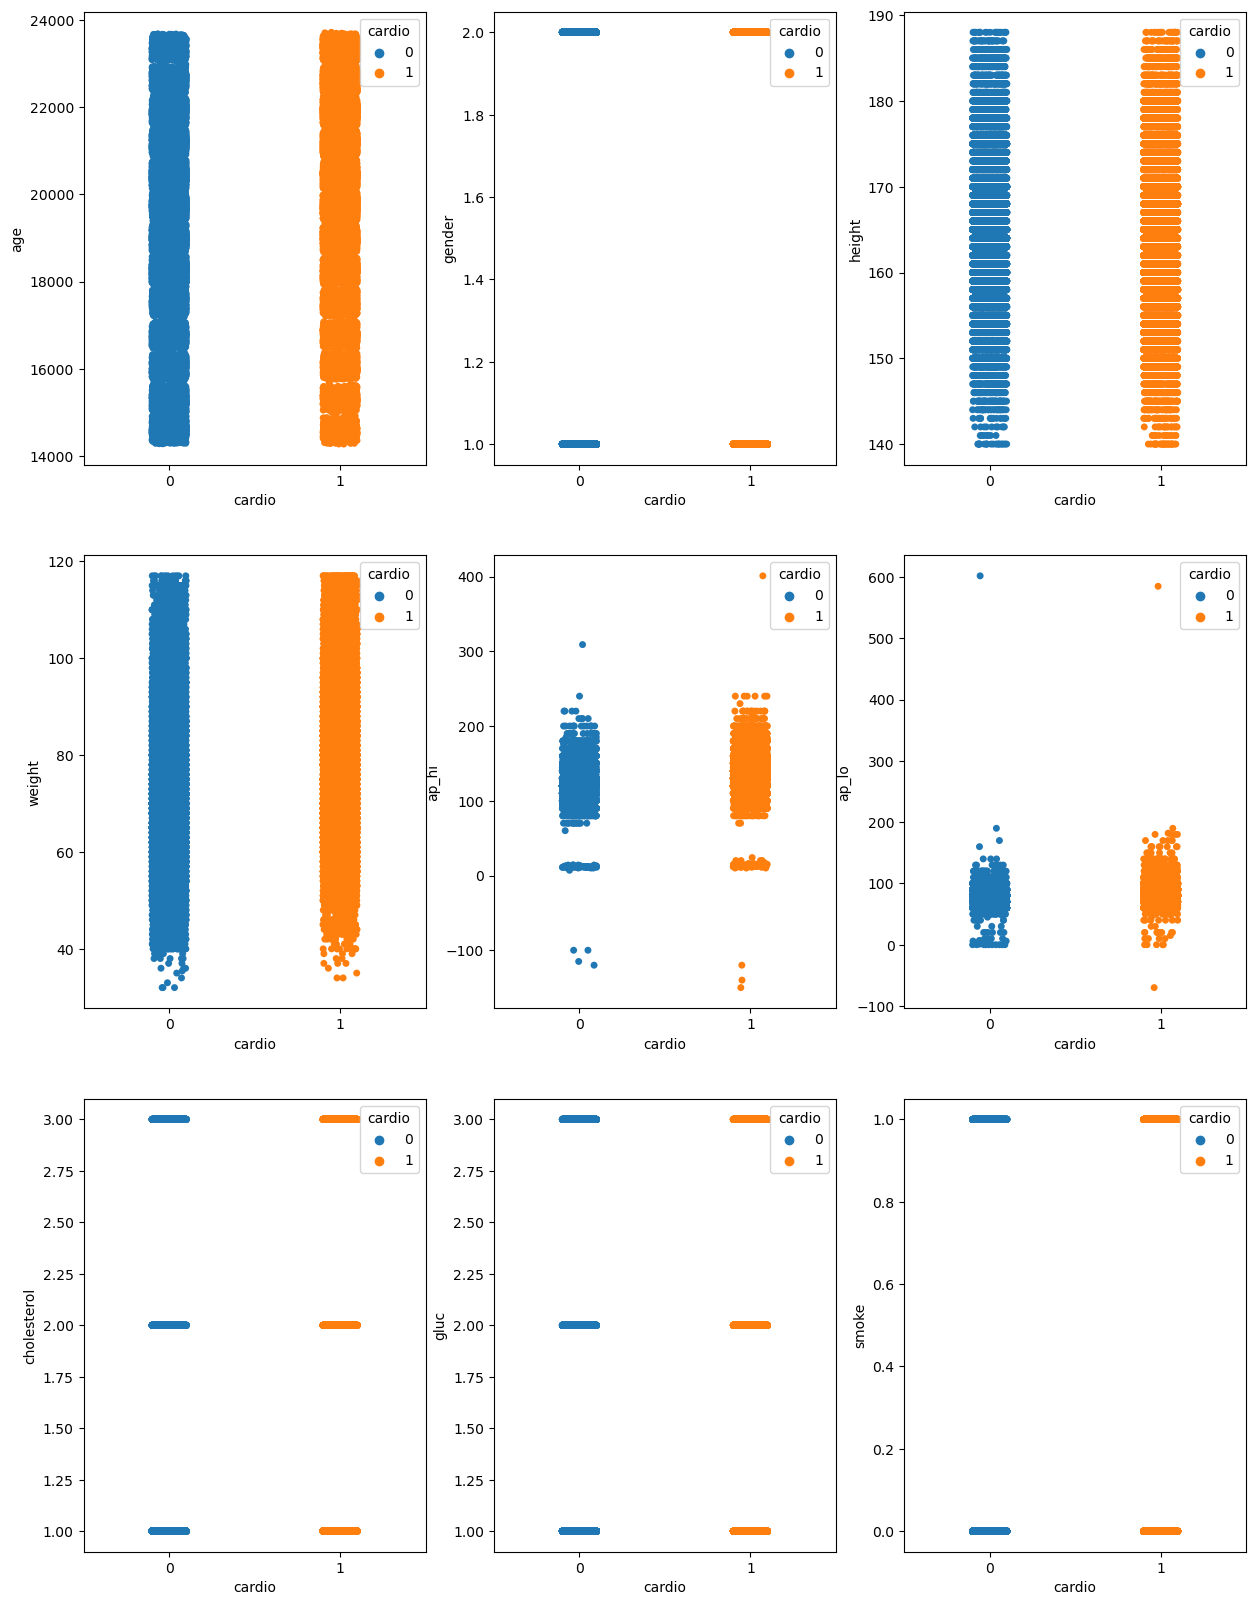

In [65]:
# 
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column],hue=y)
        
        
    plotnumber+=1
plt.show()

In [66]:
# check multicollibnear

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled.shape[1]

11

In [70]:
#finding variance inflation factor in each scaled column i.e x_scaled.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.071123,age
1,1.507506,gender
2,1.519844,height
3,1.221738,weight
4,1.658717,ap_hi
5,1.607891,ap_lo
6,1.317412,cholesterol
7,1.257853,gluc
8,1.248261,smoke
9,1.139820,alco


# All the VIF values are less than 5 and are very low. that means no MULTICOLLIENTRY. Now we can go ahead fitting our data to the model. Before that lets split our data in test and training set.

In [72]:
# train test split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state= 41)
y_train.head()

9799     1
1543     0
61808    0
7178     1
8836     0
Name: cardio, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


log_reg.fit(x_train,y_train)

LogisticRegression()

# modal confidence accuracy

In [82]:
# write one function and call as many as time to check accuracy_score of different models.
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============Train Result====================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:2f}%")
        
        
    elif train==False:
        
        pred = clf.predict(x_test)
        
        print("\n===============Train Result====================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred,digits=2))
        

In [83]:
# initiate randomforestclassifier and train

random_clf = RandomForestClassifier()

# train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
# call the function and pass dataset to check train and test score
metric_score(random_clf,x_train, x_test,y_train,y_test,train=True) #this is for training score

metric_score(random_clf,x_train, x_test,y_train,y_test,train=False) #this is for testing score




===============Train Result====================
Accuracy Score: 99.987275%

===============Train Result====================
Accuracy Score: 71.204473%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.72      0.69      0.70      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



# lets use hyperperameter tune for best accuracy

In [86]:
from sklearn.model_selection import GridSearchCV

In [97]:
# Random forest classifier
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
           'max_depth':[10,15],
            'min_samples_split':[10,11],        
            'min_samples_leaf':[5,6],
}



In [98]:
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params = > ', grd.best_params_)

best_params = >  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [100]:
random_clf = grd.best_estimator_

random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=13)

In [101]:
#call the function and pass dataset to check train test score
# call the function and pass dataset to check train and test score
metric_score(random_clf,x_train, x_test,y_train,y_test,train=True) #this is for training score

metric_score(random_clf,x_train, x_test,y_train,y_test,train=False) #this is for testing score




===============Train Result====================
Accuracy Score: 74.792162%

===============Train Result====================
Accuracy Score: 73.411520%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     10243
           1       0.76      0.68      0.72      9965

    accuracy                           0.73     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.73      0.73     20208



#  Note
# you can improve the perfomance by tweaking preprocessing methods

# Lets plot ROC AUC curve to choose best model

In [102]:
# plot ROC/AUC for multiple models without hyperparams tuning.

from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
#load your data and split it into training and testing sets
X= df.drop(columns = ['cardio'], axis=1)
y = df['cardio']


x_train,x_test,y_train,y_test = train_test_split(X, y,test_size = 0.25,random_state= 52)

#train your models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


# Lets check ROC AUC Curve for the fitted model
#### . True Positive Rate(TPR) = Out of 100 actual cardio patients how many our model predicted as cardio patient correctly.(Higher the better)
#### . False Positive Rate(FPR) = How many people were predicted as cardio patient but in reality they were healty.(lower the better)


### since it is difficult to evaluate the score based on only TRP and FPR  data, there comes AUC

Threshold of  Logistic Regression [           inf 9.97941442e-01 9.94052539e-01 ... 4.38336275e-03
 4.33757075e-03 7.73346792e-05]
Threshold of  Random Forest [       inf 1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.92       0.91       0.9
 0.89       0.88       0.87       0.86       0.85       0.8425
 0.84       0.83       0.82       0.81       0.8        0.79
 0.78       0.77       0.76       0.75       0.745      0.74
 0.735      0.73       0.72583333 0.72333333 0.72       0.719
 0.71       0.7        0.695      0.69       0.68       0.67
 0.665      0.66       0.65       0.64       0.63666667 0.63
 0.62       0.61       0.6        0.59       0.58       0.575
 0.57       0.565      0.56       0.55       0.54       0.535
 0.53233333 0.53       0.5225     0.52       0.51       0.50666667
 0.5        0.49666667 0.49       0.48833333 0.48       0.47
 0.46       0.45       0.44       0.43214286 0.43       0.4225
 0.42       0.41       0.40066667 0.

<function matplotlib.pyplot.show(close=None, block=None)>

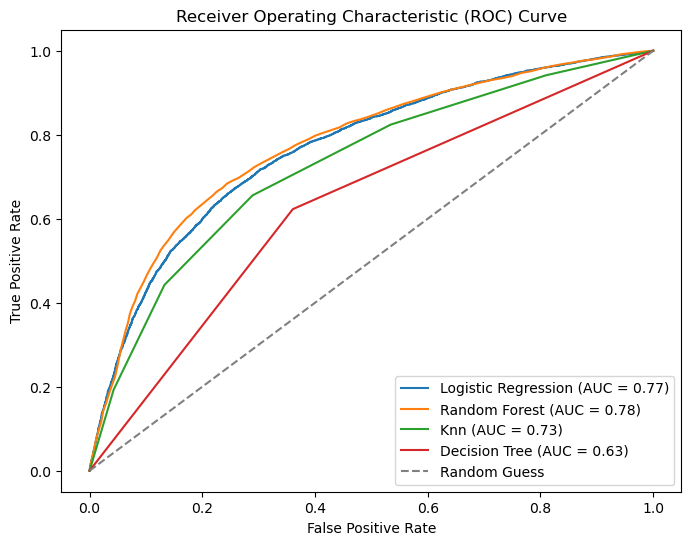

In [107]:
models = {'Logistic Regression': lr, 'Random Forest': rf,'Knn':kn,'Decision Tree':dt}

#calculate the Roc curves and Auc scores for each model
plt.figure(figsize=(8, 6))
for name, model in models.items():                        #Read key and values from the item
    model.fit(x_train, y_train)                           # Each model training
    y_prob = model.predict_proba(x_test)[:,1]             # predict prob of each model
    fpr, tpr, _ = roc_curve(y_test, y_prob)               # Finding false and true positive rate('_' is threshold)
    print('Threshold of ' ,name, _)
    roc_auc = auc(fpr, tpr)                               # auc score of each model captured
    
    
    # plot the ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    
#Add labels and legend to the plot
plt.plot([0,1],[0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

#show the plot
plt.show